In [1]:
import pandas as pd
from scipy.stats.stats import pearsonr
import numpy as np
import scipy.stats as s
import seaborn as sns
from matplotlib import pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
original_dataset = pd.read_csv("./datasets/mushrooms.csv")

In [3]:
original_dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
for i in original_dataset.columns:
    print(original_dataset[i].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [5]:
def fill_values(dataset,column,missing_value_as):
    #finding the index of missing values....
    missing_indices = np.array(dataset[dataset[column]==missing_value_as].index)
    #replacing missing values with NAN values for
    dataset[column].replace(to_replace = missing_value_as, value=np.nan, inplace = True)
    #the sum of the number of each value in that column
    relative_frequency= dict(dataset[column].value_counts()/dataset[column].value_counts().sum())
    #expecting the number of values according to their probabilities
    number_of_missing_values = np.random.multinomial(n=missing_indices.shape[0],pvals=list(relative_frequency.values()),size=1)
    #generating values according to their probability
    arr_of_found_val =found_number_of_values(number_of_missing_values,relative_frequency.keys()) # function calling
    
    dataset[column].fillna(value=dict(zip(missing_indices,arr_of_found_val)), inplace=True)

In [6]:
def found_number_of_values(num_of_miss_val,values):
    
    missing_values_found = np.empty(0) #array of found values
    
    for i,j in zip(num_of_miss_val[0],values):
        
        missing_values_found = np.append(missing_values_found, np.array(i*[j]))
        
    return missing_values_found

In [7]:
original_dataset['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [8]:
fill_values(original_dataset,'stalk-root','?') #calling a function

In [9]:
original_dataset['stalk-root'].value_counts()

b    5421
e    1640
c     796
r     267
Name: stalk-root, dtype: int64

In [10]:
working_dataset = original_dataset.copy()
working_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [11]:
row_indices = np.arange(0,len(original_dataset))
np.random.shuffle(row_indices)


In [12]:
shuffled_dataset = original_dataset.iloc[row_indices]
shuffled_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
5838,p,f,s,g,t,f,f,c,b,p,...,s,w,w,p,w,o,p,h,s,u
6662,p,k,s,n,f,s,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
1167,e,x,f,n,t,n,f,c,b,p,...,s,p,p,p,w,o,p,k,y,d
2381,e,x,f,e,t,n,f,c,b,n,...,s,g,g,p,w,o,p,k,v,d
3845,p,x,f,g,f,c,f,w,n,p,...,s,w,w,p,w,o,p,n,s,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,e,f,f,g,f,n,f,c,n,g,...,s,w,w,p,w,o,p,n,v,u
3041,p,f,f,y,f,f,f,c,b,p,...,k,p,p,p,w,o,l,h,v,d
1688,e,x,y,n,t,n,f,c,b,p,...,s,g,w,p,w,o,p,n,y,d
7434,e,k,s,g,f,n,f,w,b,p,...,s,w,w,p,w,t,p,w,s,g


In [13]:
def converstion(dataset,column_name):
    labels = dataset[column_name].unique().tolist()
    convert = {column_name : {k: v for k,v in zip(labels,list(range(0,len(labels))))}}
    dataset.replace(convert,inplace=True)

In [14]:
for features_name in working_dataset.columns:
    converstion(working_dataset,features_name)

In [15]:
working_dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,0,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,0,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,0,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,0,0,0,1,4,3,6


In [16]:
working_dataset.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,-0.112110,0.169663,-0.042028,-0.501530,-0.582015,0.129200,0.348387,0.540024,-0.412869,...,-0.532452,-0.225294,-0.098476,NaN,0.120766,0.152261,-0.556515,-0.560715,-0.155254,-0.191297
cap-shape,-0.112110,1.000000,-0.057205,0.001839,0.120509,0.175229,0.040082,-0.043906,-0.151921,0.218627,...,0.074161,0.073171,0.056450,NaN,0.042988,0.058422,0.099599,0.219476,0.139616,0.169343
cap-surface,0.169663,-0.057205,1.000000,0.016133,-0.047265,-0.106147,-0.186157,0.029686,0.267029,-0.266708,...,0.090350,0.080218,0.092631,NaN,-0.171918,-0.074779,0.107866,-0.283378,0.185359,-0.089972
cap-color,-0.042028,0.001839,0.016133,1.000000,-0.065879,0.115960,-0.163457,-0.012795,0.015113,0.023458,...,-0.042124,-0.063978,-0.065686,NaN,-0.172176,0.184474,0.040785,0.055050,0.070150,0.003142
bruises,-0.501530,0.120509,-0.047265,-0.065879,1.000000,0.588456,0.137359,0.299473,-0.369596,0.325408,...,0.530214,0.267325,0.208451,NaN,0.125606,-0.014367,0.685119,0.543409,-0.008293,0.185130
odor,-0.582015,0.175229,-0.106147,0.115960,0.588456,1.000000,-0.016816,-0.155748,-0.444492,0.599497,...,0.353683,0.214888,0.101501,NaN,-0.056362,-0.009788,0.460625,0.563857,0.277777,0.449061
gill-attachment,0.129200,0.040082,-0.186157,-0.163457,0.137359,-0.016816,1.000000,-0.071489,0.108984,0.184927,...,-0.100591,0.514289,0.595280,NaN,0.842230,0.049642,-0.073149,0.296461,0.164873,0.296916
gill-spacing,0.348387,-0.043906,0.029686,-0.012795,0.299473,-0.155748,-0.071489,1.000000,0.108333,-0.274645,...,-0.112643,-0.309026,-0.233907,NaN,-0.034235,0.206233,-0.038015,-0.173491,-0.474326,-0.341360
gill-size,0.540024,-0.151921,0.267029,0.015113,-0.369596,-0.444492,0.108984,0.108333,1.000000,-0.518717,...,-0.049072,0.186706,0.226610,NaN,0.074866,0.190112,-0.071459,-0.355811,-0.041683,-0.343122
gill-color,-0.412869,0.218627,-0.266708,0.023458,0.325408,0.599497,0.184927,-0.274645,-0.518717,1.000000,...,0.146393,0.188830,0.115547,NaN,0.169267,0.016427,0.181942,0.586547,0.293919,0.557094


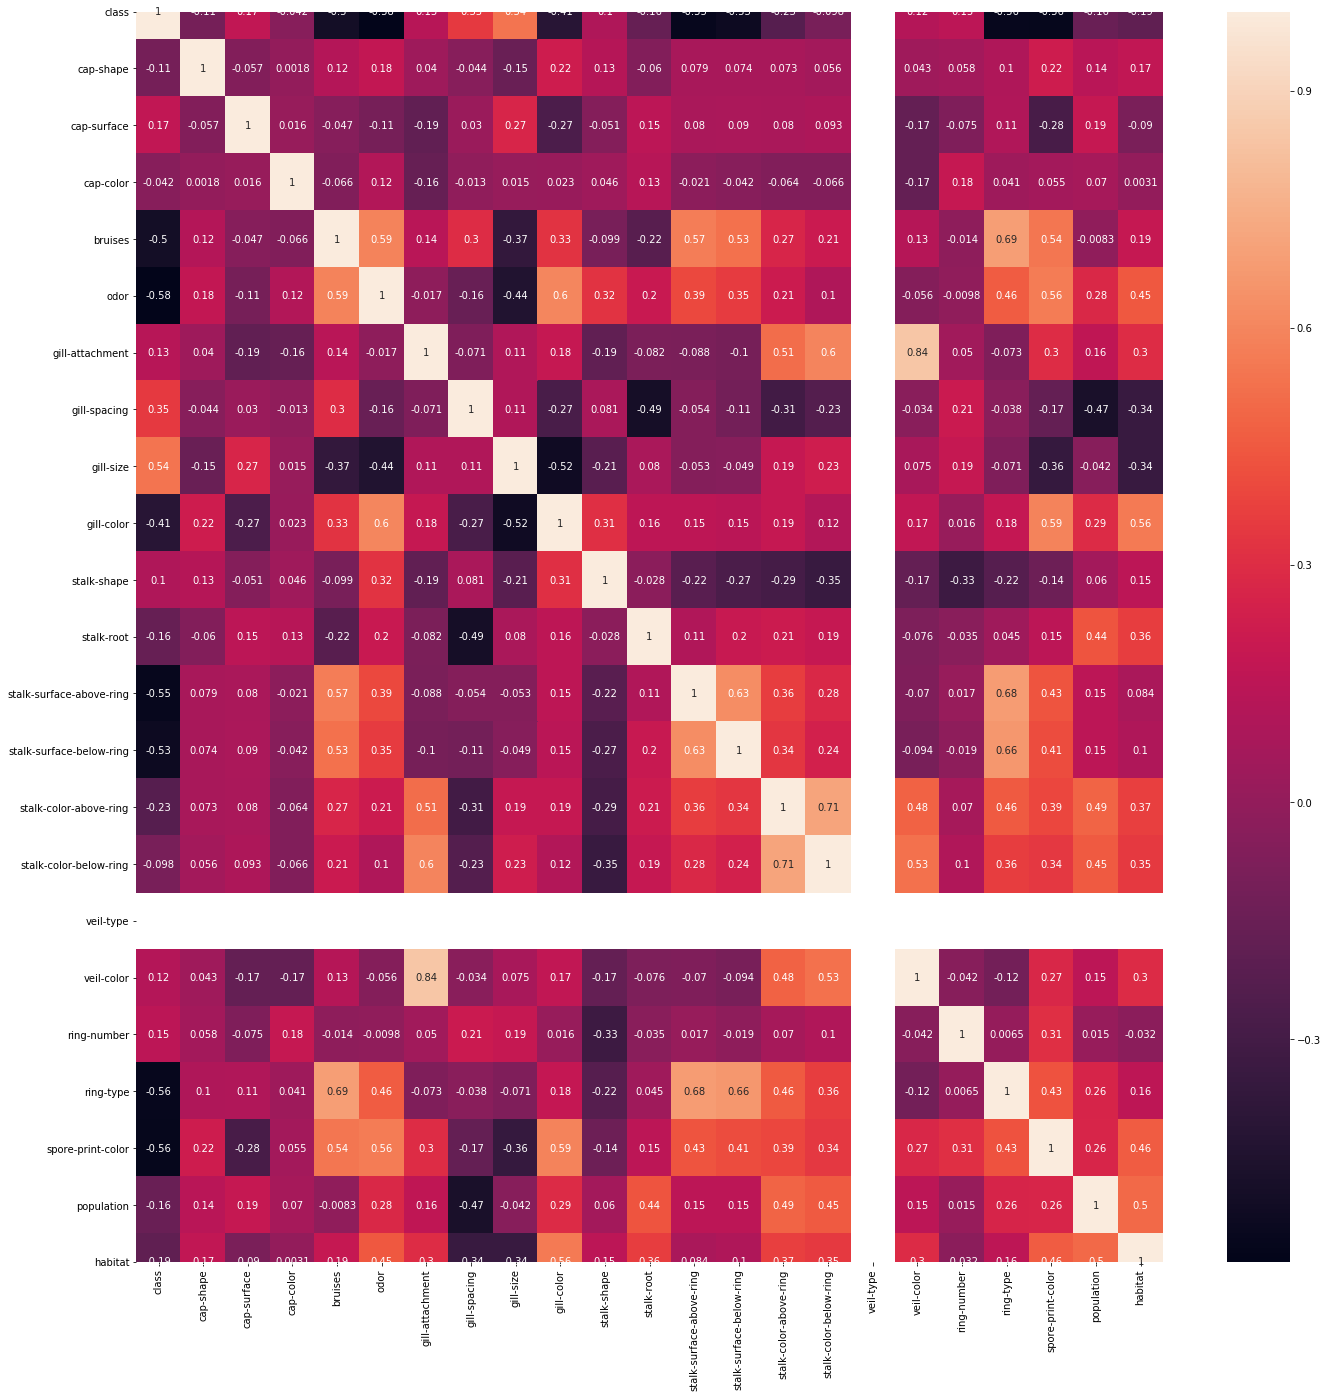

In [17]:
fig, ax= plt.subplots(1, 1, figsize = (23, 23))
sns.heatmap(working_dataset.corr(), ax = ax, annot = True)
plt.show()

In [18]:
def check_pearson(column_name):
    r = pearsonr(working_dataset['class'],working_dataset[column_name])
    return abs(r[0])

In [19]:
pearson_correlation = {}
for single_column in working_dataset.columns[1:]:
    pearson_correlation[single_column] = check_pearson(single_column)

C:\Users\Mohnish\Anaconda3\lib\site-packages\scipy\stats\stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [20]:
pearson_correlation

{'cap-shape': 0.11211031703516439,
 'cap-surface': 0.16966305405172988,
 'cap-color': 0.042028251761978164,
 'bruises': 0.5015303774075579,
 'odor': 0.5820154327236085,
 'gill-attachment': 0.1291998602678841,
 'gill-spacing': 0.3483867851842736,
 'gill-size': 0.5400243574330182,
 'gill-color': 0.4128694256416529,
 'stalk-shape': 0.10201901701656196,
 'stalk-root': 0.16247051185129935,
 'stalk-surface-above-ring': 0.5520436410013898,
 'stalk-surface-below-ring': 0.53245229042052,
 'stalk-color-above-ring': 0.22529398127468064,
 'stalk-color-below-ring': 0.09847579450544246,
 'veil-type': nan,
 'veil-color': 0.12076593697596376,
 'ring-number': 0.1522608242966559,
 'ring-type': 0.556514718288964,
 'spore-print-color': 0.5607152345831532,
 'population': 0.1552537114255424,
 'habitat': 0.1912969397259856}

In [21]:
feature_column =max(pearson_correlation,key=pearson_correlation.get)
feature_column

'odor'

In [22]:
selected_dataset = shuffled_dataset[['class',feature_column]]

In [23]:
selected_dataset

,class,odor
5838,p,f
6662,p,s
1167,e,n
2381,e,n
3845,p,c
...,...,...
547,e,n
3041,p,f
1688,e,n
7434,e,n


In [24]:
training_data = selected_dataset.iloc[0:int(0.75*len(selected_dataset))]

In [25]:
training_data

,class,odor
5838,p,f
6662,p,s
1167,e,n
2381,e,n
3845,p,c
...,...,...
4753,p,f
208,e,l
6692,p,y
7106,p,f


In [26]:
e_training_data = training_data[training_data['class'] == 'e']
e_training_data

,class,odor
1167,e,n
2381,e,n
1818,e,n
7744,e,n
3014,e,n
...,...,...
3657,e,n
2608,e,n
2992,e,n
208,e,l


In [27]:
p_training_data = training_data[training_data['class'] == 'p']
p_training_data

,class,odor
5838,p,f
6662,p,s
3845,p,c
3933,p,f
7703,p,y
...,...,...
5136,p,f
5016,p,f
4753,p,f
6692,p,y


In [28]:
remaining_data = selected_dataset.iloc[int(0.75*len(selected_dataset)):]

In [29]:
remaining_data

,class,odor
1489,p,p
3239,p,f
5924,p,f
4308,p,f
2111,e,n
...,...,...
547,e,n
3041,p,f
1688,e,n
7434,e,n


In [30]:
validation_data = remaining_data.iloc[0:int(0.33*len(remaining_data))]
validation_data

,class,odor
1489,p,p
3239,p,f
5924,p,f
4308,p,f
2111,e,n
...,...,...
5918,p,f
6509,e,n
4448,p,f
3861,e,n


In [31]:
testing_data = remaining_data.iloc[int(0.33*len(remaining_data)):]
testing_data

,class,odor
5717,p,n
7919,e,n
5000,p,f
2615,e,n
1978,e,n
...,...,...
547,e,n
3041,p,f
1688,e,n
7434,e,n


In [32]:
def relative_frequency(dataset,column):
    frequency = dataset[column].value_counts()
    rf = np.array(frequency)/dataset.shape[0]
    rf_column = dict(zip(frequency.keys(),rf))
    return rf_column
#     return {column : {k: v for k,v in zip(frequency,frequency/training_data.shape[0])}}

In [33]:
class_frequency = relative_frequency(training_data,'class')
class_frequency

{'e': 0.5196126702773675, 'p': 0.48038732972263254}

\begin{equation}
\text{Prior Probability}\\ \text{P(A) => P(class='e')}
\end{equation}

In [34]:
training_prior_prob_e = class_frequency['e']
training_prior_prob_p = class_frequency['p']
print(training_prior_prob_e,training_prior_prob_p)

0.5196126702773675 0.48038732972263254


\begin{equation}
\text{Evidence or Normalizing Probability }\\ \text{P(B) => P(odor = x)}
\end{equation}

$$P(B) = P(odor = n | class = p) P(class = p) + P(odor = n | class = e) P(class = e)$$

In [35]:
original_dataset['odor'].value_counts()

n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

In [36]:
original_dataset['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [37]:
original_data_odor_unique_values=original_dataset['odor'].unique()
original_data_odor_unique_values

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

In [38]:
training_data.shape[0] #number of rows

6093

In [39]:
e_odor_unique_values = e_training_data['odor'].unique()
e_odor_unique_values

array(['n', 'l', 'a'], dtype=object)

In [40]:
e_odor_frequency = relative_frequency(e_training_data,'odor')
e_odor_frequency

{'n': 0.8066961465571699, 'l': 0.09665192672141504, 'a': 0.09665192672141504}

In [41]:
p_odor_unique_values = p_training_data['odor'].unique()
p_odor_unique_values

array(['f', 's', 'c', 'y', 'n', 'p', 'm'], dtype=object)

In [42]:
p_odor_frequency = relative_frequency(p_training_data,'odor')
p_odor_frequency

{'f': 0.5517594806969593,
 's': 0.15066621113768364,
 'y': 0.1458831568158524,
 'p': 0.06525452681926888,
 'c': 0.04953877690468056,
 'n': 0.029723266142808336,
 'm': 0.00717458148274684}

In [43]:
def find_missing_val_for_laplace_smoothing(total_values,values_of_1st_target,values_of_2nd_target):
    missing_val_1st_target = np.setdiff1d(total_values,values_of_1st_target)
    missing_val_2nd_target = np.setdiff1d(total_values,values_of_2nd_target)
    return [missing_val_1st_target,missing_val_2nd_target]

In [106]:
missing_values = find_missing_val_for_laplace_smoothing(original_data_odor_unique_values,e_odor_unique_values,p_odor_unique_values)
print('missing_values "e"',missing_values[0])
#missing values of e_training data
print('missing_values "p"',missing_values[1])
#missing values of p_trainig data

missing_values "e" ['c' 'f' 'm' 'p' 's' 'y']
missing_values "p" ['a' 'l']


$$\lambda = \frac{1}{column total + 1}$$

In [45]:
def laplace_smothing(frequency_dictionary,particular_dataset,whole_dataset,column,missing_values):
    for i in missing_values:
        frequency_dictionary[i] = 1/(particular_dataset.shape[0] + whole_dataset[column].unique().shape[0])
    ## Normalizing the data
    total_freq = np.sum(list(frequency_dictionary.values()))
    frequency_dictionary = {k: (v/total_freq) for k, v in frequency_dictionary.items()}
    return frequency_dictionary

```
Total = 50 
unique_features = ['a', 'e','u']

curr_relavtive_freq = 50 / 50

adding 'o'

unique_features = ['a', 'e', 'i', 'o', 'u']

curr_relative_freq = 51 / 51

curr_relative_freq = 51/ 51

```

In [46]:
updated_e_odor_frequency=laplace_smothing(e_odor_frequency,e_training_data,original_dataset,feature_column,missing_values[0])

In [47]:
updated_e_odor_frequency

{'n': 0.80517455684345,
 'l': 0.0964696219240782,
 'a': 0.0964696219240782,
 'c': 0.00031436655139893113,
 'f': 0.00031436655139893113,
 'm': 0.00031436655139893113,
 'p': 0.00031436655139893113,
 's': 0.00031436655139893113,
 'y': 0.00031436655139893113}

In [48]:
updated_p_odor_frequency=laplace_smothing(p_odor_frequency,p_training_data,original_dataset,feature_column,missing_values[1])

In [49]:
updated_p_odor_frequency

{'f': 0.5513838785998204,
 's': 0.15056364734521413,
 'y': 0.14578384901679461,
 'p': 0.06521010576629456,
 'c': 0.04950505411577335,
 'n': 0.02970303246946401,
 'm': 0.007169697492629244,
 'a': 0.00034036759700476507,
 'l': 0.00034036759700476507}

In [50]:
def predicted_category(x):
    
    likelihood_e = updated_e_odor_frequency[x]
    
    likelihood_p = updated_p_odor_frequency[x]
    
    numerator = likelihood_e * training_prior_prob_e
    
    denominator = numerator + (likelihood_p * training_prior_prob_p)
    
    posterior_p = numerator/denominator
    
    return int(posterior_p > 0.5)

In [51]:
validation_predicted_answers = []

In [52]:
for val in validation_data[feature_column]:
    validation_predicted_answers.append(predicted_category(val))

In [53]:
validation_predicted_answers

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [54]:
validation_data

,class,odor
1489,p,p
3239,p,f
5924,p,f
4308,p,f
2111,e,n
...,...,...
5918,p,f
6509,e,n
4448,p,f
3861,e,n


In [55]:
converstion(validation_data,'class')

C:\Users\Mohnish\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [56]:
validation_data

,class,odor
1489,0,p
3239,0,f
5924,0,f
4308,0,f
2111,1,n
...,...,...
5918,0,f
6509,1,n
4448,0,f
3861,1,n


In [57]:
validation_actual_answers = np.array(validation_data['class'])
validation_actual_answers

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,

In [58]:
validation_correct_count = np.count_nonzero(validation_predicted_answers==validation_actual_answers)

In [59]:
validation_correct_count

663

In [60]:
validation_accuracy = (validation_correct_count/validation_data.shape[0])*100

In [61]:
validation_accuracy

98.955223880597

In [62]:
testing_predicted_answers = []

In [63]:
for val in testing_data[feature_column]:
    testing_predicted_answers.append(predicted_category(val))

In [93]:
testing_predicted_answers

[1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,


In [65]:
testing_data

,class,odor
5717,p,n
7919,e,n
5000,p,f
2615,e,n
1978,e,n
...,...,...
547,e,n
3041,p,f
1688,e,n
7434,e,n


In [66]:
converstion(testing_data,'class')

In [67]:
testing_data

,class,odor
5717,0,n
7919,1,n
5000,0,f
2615,1,n
1978,1,n
...,...,...
547,1,n
3041,0,f
1688,1,n
7434,1,n


In [68]:
testing_actual_answers = np.array(testing_data['class'])

In [90]:
testing_actual_answers

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [70]:
testing_correct_count = np.count_nonzero(testing_actual_answers == testing_predicted_answers)

In [71]:
testing_correct_count

1335

In [72]:
testing_accuracy = (testing_correct_count/testing_data.shape[0])*100

In [73]:
testing_accuracy

98.08963997060984

In [97]:
confusion_matrix = pd.crosstab(np.array(testing_predicted_answers),testing_actual_answers, colnames= ['actual'], rownames = ['predicted'], margins = True)

In [101]:
confusion_matrix

actual,0,1,All
predicted,,,
0,628,0,628
1,26,707,733
All,654,707,1361


In [108]:
TP = confusion_matrix[0][0]
print('True Positive',TP)
TN = confusion_matrix[1][1]
print('True Negative',TN)
FP = confusion_matrix[0][1]
print('False Positive',FP)
FN = confusion_matrix[1][0]
print('False Negative',FN)

True Positive 628
True Negative 707
False Positive 26
False Negative 0
